In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data
Data = pd.read_csv(r'C:\Users\User\Desktop\decision_tree_models\data.csv')
print('Data = \n',Data.head(10))

Data = 
          X1        Y1        X2        Y2        X3        Y3        X4  \
0  0.860019 -3.096488  0.753413 -2.530522  0.629331 -1.962419  0.361692   
1  0.456454 -2.852605  0.565661 -2.188466  0.568863 -1.593943  0.363601   
2 -0.462493 -2.031486 -0.125549 -1.528304  0.123850 -1.026633  0.238231   
3  0.106369 -2.186939  0.116188 -1.520864  0.142727 -0.703652  0.068778   
4  0.381094 -3.316631  0.390072 -2.754067  0.427469 -2.131407  0.336888   
5 -0.262968 -3.256483 -0.094474 -2.594541  0.073604 -1.954448  0.088474   
6 -0.970940 -2.595038 -0.683583 -2.042165 -0.376025 -1.472786 -0.190104   
7 -0.304093 -1.997585 -0.215963 -1.307632 -0.116897 -0.454085 -0.069022   
8  0.055419 -3.592592  0.131205 -2.973669  0.252867 -2.286043  0.242098   
9 -0.344932 -3.766955 -0.137432 -2.997226  0.053303 -2.269871  0.066792   

         Y4      Angle        X5        Y5        X6        Y6        X7  \
0 -1.227911  15.958005  0.456454 -2.852605  0.565661 -2.188466  0.568863   
1 -0.907820  

In [3]:
DataA8= Data.loc[(Data['Angle number'] ==4) & (Data['RightorLeft'] ==0)]
print('Data = \n',DataA8.head(10))

Data = 
           X1        Y1        X2        Y2        X3        Y3        X4  \
2  -0.462493 -2.031486 -0.125549 -1.528304  0.123850 -1.026633  0.238231   
6  -0.970940 -2.595038 -0.683583 -2.042165 -0.376025 -1.472786 -0.190104   
10 -0.905729 -3.185208 -0.604510 -2.520129 -0.291183 -1.861470 -0.161199   
17 -1.028285 -2.403042 -0.702093 -1.866702 -0.364537 -1.304967 -0.162872   
21 -0.772966 -2.529301 -0.519489 -1.918955 -0.261585 -1.335069 -0.139286   
25 -0.950071 -3.015571 -0.629420 -2.348733 -0.316467 -1.700216 -0.178130   
29 -0.938919 -2.950183 -0.652882 -2.274927 -0.363043 -1.625471 -0.223529   
33 -0.720192 -2.764966 -0.487893 -2.103504 -0.249392 -1.470145 -0.159422   
37 -0.265576 -2.449618 -0.112006 -1.829522  0.056950 -1.260605  0.035554   
41 -0.417400 -2.488517 -0.228773 -1.860443 -0.032114 -1.287006 -0.017579   

          Y4      Angle        X5        Y5        X6        Y6        X7  \
2  -0.510583  15.635178 -0.915264 -0.867298 -0.556912 -0.619065 -0.347119   


In [4]:
DataA8_ = DataA8.drop("Angle number", axis=1)
DataA8_prepared = DataA8_.drop("RightorLeft", axis=1)

In [5]:
DataA8_prepared

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
2,-0.462493,-2.031486,-0.125549,-1.528304,0.123850,-1.026633,0.238231,-0.510583,15.635178,-0.915264,-0.867298,-0.556912,-0.619065,-0.347119,-0.385286,-0.006106,-0.007940
6,-0.970940,-2.595038,-0.683583,-2.042165,-0.376025,-1.472786,-0.190104,-0.800848,14.902200,-1.493574,-1.457450,-1.151122,-1.159289,-0.929195,-0.890322,-0.549895,-0.352399
10,-0.905729,-3.185208,-0.604510,-2.520129,-0.291183,-1.861470,-0.161199,-1.063399,14.901276,-1.378063,-2.057012,-1.033132,-1.686316,-0.812804,-1.350433,-0.489363,-0.655708
17,-1.028285,-2.403042,-0.702093,-1.866702,-0.364537,-1.304967,-0.162872,-0.680061,16.155923,-1.499234,-1.217225,-1.123276,-0.936887,-0.894866,-0.679458,-0.499928,-0.207227
21,-0.772966,-2.529301,-0.519489,-1.918955,-0.261585,-1.335069,-0.139286,-0.707567,15.983317,-1.371189,-1.335171,-1.033760,-1.006373,-0.829050,-0.731507,-0.493947,-0.248378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,-0.743305,-2.685703,-0.486570,-2.022475,-0.239651,-1.408437,-0.140173,-0.771934,17.651536,-1.328001,-1.453375,-0.992668,-1.114325,-0.802139,-0.823614,-0.488821,-0.299848
4301,-0.592752,-2.425868,-0.374493,-1.870975,-0.139620,-1.314384,-0.052026,-0.693141,17.493241,-1.199660,-1.299342,-0.890855,-0.999903,-0.705837,-0.735752,-0.413675,-0.236217
4305,-0.985500,-2.957197,-0.683504,-2.450227,-0.347383,-1.889767,-0.146442,-1.103831,11.689934,-1.370747,-2.014043,-1.039085,-1.716487,-0.806827,-1.433603,-0.451581,-0.722344
4309,-0.190955,-2.424954,-0.080338,-1.829171,0.054836,-1.258905,0.023087,-0.660514,18.763648,-0.930549,-1.242711,-0.672814,-0.926325,-0.529632,-0.661913,-0.328529,-0.198796


In [6]:
# import seaborn as sns
# sns.pairplot(DataA8_prepared)

In [7]:
# split the data 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DataA8_prepared, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
4167,-0.719605,-2.532566,-0.463795,-2.047576,-0.174485,-1.502681,-0.037142,-0.819608,13.176773,-1.269024,-1.486353,-0.943418,-1.219976,-0.727508,-0.956335,-0.393756,-0.380361
3973,-1.026503,-2.131126,-0.718864,-1.616783,-0.407801,-1.121611,-0.204054,-0.563866,17.036037,-1.541656,-1.085272,-1.199621,-0.798126,-0.970296,-0.559131,-0.597783,-0.088663
1933,-2.021494,-2.496682,-1.458389,-2.007832,-0.948631,-1.538626,-0.516453,-0.910365,10.357880,-2.157534,-1.361721,-1.716303,-1.161666,-1.380813,-0.954678,-0.804243,-0.429495
3977,-0.596038,-2.228408,-0.349310,-1.744902,-0.095143,-1.228720,-0.001306,-0.634130,14.168658,-1.173779,-1.181578,-0.864427,-0.914658,-0.660890,-0.667680,-0.370088,-0.171424
3740,-1.011365,-2.284554,-0.723624,-1.786234,-0.416908,-1.265367,-0.207380,-0.654413,10.909813,-1.538829,-1.242647,-1.209129,-0.963545,-0.984313,-0.708992,-0.604840,-0.195664


In [9]:
DataA8_prepared = train_set.copy()

In [10]:
corr_matrix = DataA8_prepared.corr()
corr_matrix["Angle"].sort_values(ascending=False)

Angle    1.000000
X1       0.430168
X2       0.420170
X3       0.408944
Y7       0.387410
Y8       0.374439
Y6       0.370075
X6       0.365933
X5       0.365374
Y4       0.358897
Y3       0.357620
X4       0.357276
X7       0.347984
Y5       0.346587
Y2       0.330045
X8       0.297741
Y1       0.270279
Name: Angle, dtype: float64

In [11]:
# Prepare the data for Machine Learning algorithms

DataA8_prepared = train_set.drop("Angle", axis=1) # drop labels for training set
DataA8_prepared_label = train_set["Angle"].copy()

In [12]:
# Select and train a model 

from sklearn.ensemble import RandomForestRegressor
dc_tr=RandomForestRegressor(n_estimators=100,random_state=42)
dc_tr.fit(DataA8_prepared, DataA8_prepared_label)

RandomForestRegressor(random_state=42)

In [13]:
some_data = DataA8_prepared.iloc[:5]
some_labels = DataA8_prepared_label.iloc[:5]
print("Predictions:", dc_tr.predict(some_data))

Predictions: [23.31152899  8.9041922  16.36384737  7.78189389 14.76059067]


In [14]:
# Compare against the actual values:

print("Labels:", list(some_labels))

Labels: [27.7803723, 6.7645678, 15.63517816, 6.086716654, 14.51986664]


In [15]:
from sklearn.metrics import mean_squared_error

Data_predictions = dc_tr.predict(DataA8_prepared)
lin_mse = mean_squared_error(DataA8_prepared_label, Data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7145359460534966

In [16]:
# Cross Validation

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(dc_tr, DataA8_prepared, DataA8_prepared_label,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [4.69451552 4.19787829 4.2421525  5.27356115 4.34650348 4.83038246
 4.83316644 4.40431507 4.9521969  4.05398151]
Mean: 4.582865333425157
Standard deviation: 0.3717005686212676


In [18]:
X_test = test_set.drop("Angle", axis=1)
y_test = test_set["Angle"].copy()

final_predictions = dc_tr.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

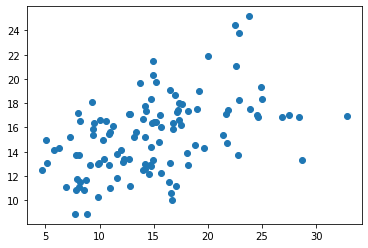

In [19]:
plt.scatter(y_test, final_predictions)

(array([ 9., 11., 24., 29., 15., 11.,  9.,  3.,  1.,  2.]),
 array([-9.85891004, -7.28586578, -4.71282152, -2.13977725,  0.43326701,
         3.00631127,  5.57935553,  8.15239979, 10.72544406, 13.29848832,
        15.87153258]),
 <BarContainer object of 10 artists>)

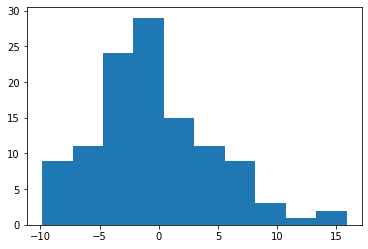

In [20]:
plt.hist(y_test - final_predictions)

In [21]:
final_rmse

5.10660080283373

In [22]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.32127549, 5.78630466])

In [23]:
import sklearn.metrics as sm

print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, final_predictions), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, final_predictions), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, final_predictions), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, final_predictions), 2))
print("R2 score =", round(sm.r2_score(y_test, final_predictions), 2))

Regressor model performance:
Mean absolute error(MAE) = 4.0
Mean squared error(MSE) = 26.08
Median absolute error = 3.39
Explain variance score = 0.23
R2 score = 0.22


In [24]:
def mean_absolute_percentage_error(y_test, final_predictions): 
    y_test, final_predictions = np.array(y_test), np.array(final_predictions)
    return np.mean(np.abs((y_test - final_predictions) / final_predictions)) * 100

In [25]:
print(mean_absolute_percentage_error(y_test, final_predictions))

26.753040423639707
